In [1]:
#import librairies "matplotlib ,seaborn,scipy"have been added 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


In [2]:
path = r'C:\Users\karim\Documents\achievement 6 data sourcing'

In [3]:
df_ranking= pd.read_pickle(os.path.join(path, '02 Data', 'prepared Data', 'times_cwur_shanghai_combined.pkl'))

In [4]:
df_ranking.head(10)

year  country                           university_name times_world_rank  \
0  2014   Poland  AGH University of Science and Technology              NaN   
1  2015   Poland  AGH University of Science and Technology              NaN   
2  2016   Poland  AGH University of Science and Technology          601-800   
3  2012  Denmark                        Aalborg University          301-350   
4  2013  Denmark                        Aalborg University          351-400   
5  2014  Denmark                        Aalborg University          301-350   
6  2015  Denmark                        Aalborg University          351-400   
7  2016  Denmark                        Aalborg University          201-250   
8  2005      NaN                          Aalto University              NaN   
9  2006      NaN                          Aalto University              NaN   

   times_teaching times_international  times_research  times_citations  \
0             NaN                 NaN             NaN              NaN   
1             NaN                 NaN             NaN              NaN   
2            14.2                17.9             3.7             35.7   
3            19.0                75.3            20.0             27.1   
4            21.7                67.2            24.9             41.0   
5            20.0                70.8            24.5             46.0   
6            23.8                65.8            28.5             39.9   
7            25.1                  71            28.4             73.8   
8             NaN                 NaN             NaN              NaN   
9             NaN                 NaN             NaN              NaN   

  times_income times_total_score  ...  cwur_broad_impact  cwur_patents  \
0          NaN               NaN  ...              909.0         552.0   
1          NaN               NaN  ...              896.0         398.0   
2            -                 -  ...                NaN           NaN   
3         36.4                 -  ...                NaN           NaN   
4           39                 -  ...                NaN           NaN   
5         39.8                 -  ...              543.0         426.0   
6         43.9                 -  ...              520.0         401.0   
7         43.7                 -  ...                NaN           NaN   
8          NaN               NaN  ...                NaN           NaN   
9          NaN               NaN  ...                NaN           NaN   

   cwur_score  shanghai_world_rank  Quality_of_Education_alumnni  \
0       44.71                  NaN                           NaN   
1       44.26                  NaN                           NaN   
2         NaN                  NaN                           NaN   
3         NaN                  NaN                           NaN   
4         NaN                  NaN                           NaN   
5       44.83              401-500                           0.0   
6       44.59              301-400                           0.0   
7         NaN                  NaN                           NaN   
8         NaN              401-500                           0.0   
9         NaN              401-500                           0.0   

   shanghai_fa_awrds  Quality of Faculty_Highly_Cited_Researchers  \
0                NaN                                          NaN   
1                NaN                                          NaN   
2                NaN                                          NaN   
3                NaN                                          NaN   
4                NaN                                          NaN   
5                0.0                                         12.2   
6                0.0                                         11.2   
7                NaN                                          NaN   
8                0.0                                          0.0   
9                0.0                                          0.

# 2- Use the questions you defined in the previous task to pick out variables from your data set suitable for your exploratory visual analysis

	What are the five top universities?
    What are the five countries with top universities?
    How do these rankings compare to each other?
    Are the various criticisms pointed against these rankings fair or not?
    Are there any suspicious ethical discrimination in the raking scores?
    Are there trends in the ranking score over time?
    Are there correlations between ranking indicators and the total score?

In [6]:
df_ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8049 entries, 0 to 8048
Data columns (total 28 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   year                                         8049 non-null   int64  
 1   country                                      4262 non-null   object 
 2   university_name                              8049 non-null   object 
 3   times_world_rank                             2603 non-null   object 
 4   times_teaching                               2603 non-null   float64
 5   times_international                          2603 non-null   object 
 6   times_research                               2603 non-null   float64
 7   times_citations                              2603 non-null   float64
 8   times_income                                 2603 non-null   object 
 9   times_total_score                            2603 non-null   object 
 10  

In [7]:
df_ranking['times_world_rank'] = pd.to_numeric(df_ranking['times_world_rank'], errors='coerce')

In [8]:
df_ranking['times_international'] = pd.to_numeric(df_ranking['times_international'], errors='coerce')

In [9]:
df_ranking['times_total_score'] = pd.to_numeric(df_ranking['times_total_score'], errors='coerce')

In [10]:
df_ranking['times_income'] = pd.to_numeric(df_ranking['times_income'], errors='coerce')

In [11]:
df_ranking['shanghai_world_rank'] = pd.to_numeric(df_ranking['shanghai_world_rank'], errors='coerce')

In [12]:
df_ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8049 entries, 0 to 8048
Data columns (total 28 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   year                                         8049 non-null   int64  
 1   country                                      4262 non-null   object 
 2   university_name                              8049 non-null   object 
 3   times_world_rank                             1201 non-null   float64
 4   times_teaching                               2603 non-null   float64
 5   times_international                          2594 non-null   float64
 6   times_research                               2603 non-null   float64
 7   times_citations                              2603 non-null   float64
 8   times_income                                 2385 non-null   float64
 9   times_total_score                            1201 non-null   float64
 10  

# 3 Create a correlation matrix heatmap (colored)

In [14]:

matx_ranking=df_ranking[['times_world_rank','times_teaching','times_international','times_research','times_citations','times_total_score',
                      'cwur_world_rank','cwur_quality_of_education', 'cwur_alumni_employment', 'cwur_quality_of_faculty', 'cwur_publications',
                       'cwur_influence','cwur_citations',
                         'shanghai_world_rank','shanghai_science_output', 'shanghai_fa_awrds', 'Quality of Faculty_Highly_Cited_Researchers','Research_Output_pub' ]]

In [15]:
ranking_corr=matx_ranking.corr()

In [16]:
ranking_corr

times_world_rank  times_teaching  \
times_world_rank                                     1.000000       -0.807394   
times_teaching                                      -0.807394        1.000000   
times_international                                 -0.094626        0.137834   
times_research                                      -0.831215        0.913120   
times_citations                                     -0.515432        0.503867   
times_total_score                                   -0.917059        0.894085   
cwur_world_rank                                      0.476906       -0.655644   
cwur_quality_of_education                            0.312994       -0.560356   
cwur_alumni_employment                               0.347730       -0.581885   
cwur_quality_of_faculty                              0.392115       -0.597123   
cwur_publications                                    0.457919       -0.624534   
cwur_influence                                       0.381702       -0.535380   
cwur_citations                                       0.468746       -0.564634   
shanghai_world_rank                                  0.754884       -0.814074   
shanghai_science_output                             -0.669010        0.773483   
shanghai_fa_awrds                                   -0.605011        0.679046   
Quality of Faculty_Highly_Cited_Researchers         -0.688345        0.756112   
Research_Output_pub                                 -0.584018        0.699745   

                                             times_international  \
times_world_rank                                       -0.094626   
times_teaching                                          0.137834   
times_international                                     1.000000   
times_research                                          0.251146   
times_citations                                         0.325030   
times_total_score                                       0.123829   
cwur_world_rank                                        -0.069569   
cwur_quality_of_education                              -0.176843   
cwur_alumni_employment                                 -0.009101   
cwur_quality_of_faculty                                -0.132086   
cwur_publications                                      -0.048104   
cwur_influence                                         -0.238227   
cwur_citations                                         -0.188465   
shanghai_world_rank                                    -0.078985   
shanghai_science_output                                 0.072107   
shanghai_fa_awrds                                       0.124602   
Quality of Faculty_Highly_Cited_Researchers            -0.005995   
Research_Output_pub                                    -0.021544   

                                             times_research  times_citations  \
times_world_rank                                  -0.831215        -0.515432   
times_teaching                                     0.913120         0.503867   
times_international                                0.251146         0.325030   
times_research                                     1.000000         0.525264   
times_citations                                    0.525264         1.000000   
times_total_score                                  0.904166         0.546015   
cwur_world_rank                                   -0.630380        -0.250504   
cwur_quality_of_education                         -0.546291        -0.315102   
cwur_alumni_employment                            -0.544125         0.012220   
cwur_quality_of_faculty                           -0.577430        -0.294989   
cwur_publications                                 -0.632504        -0.211546   
cwur_influence                                    -0.542953        -0.351512   
cwur_citations                                    -0.583801        -0.431528   
shanghai_world_rank                               -0.802331        -0.584982   
shanghai_sci

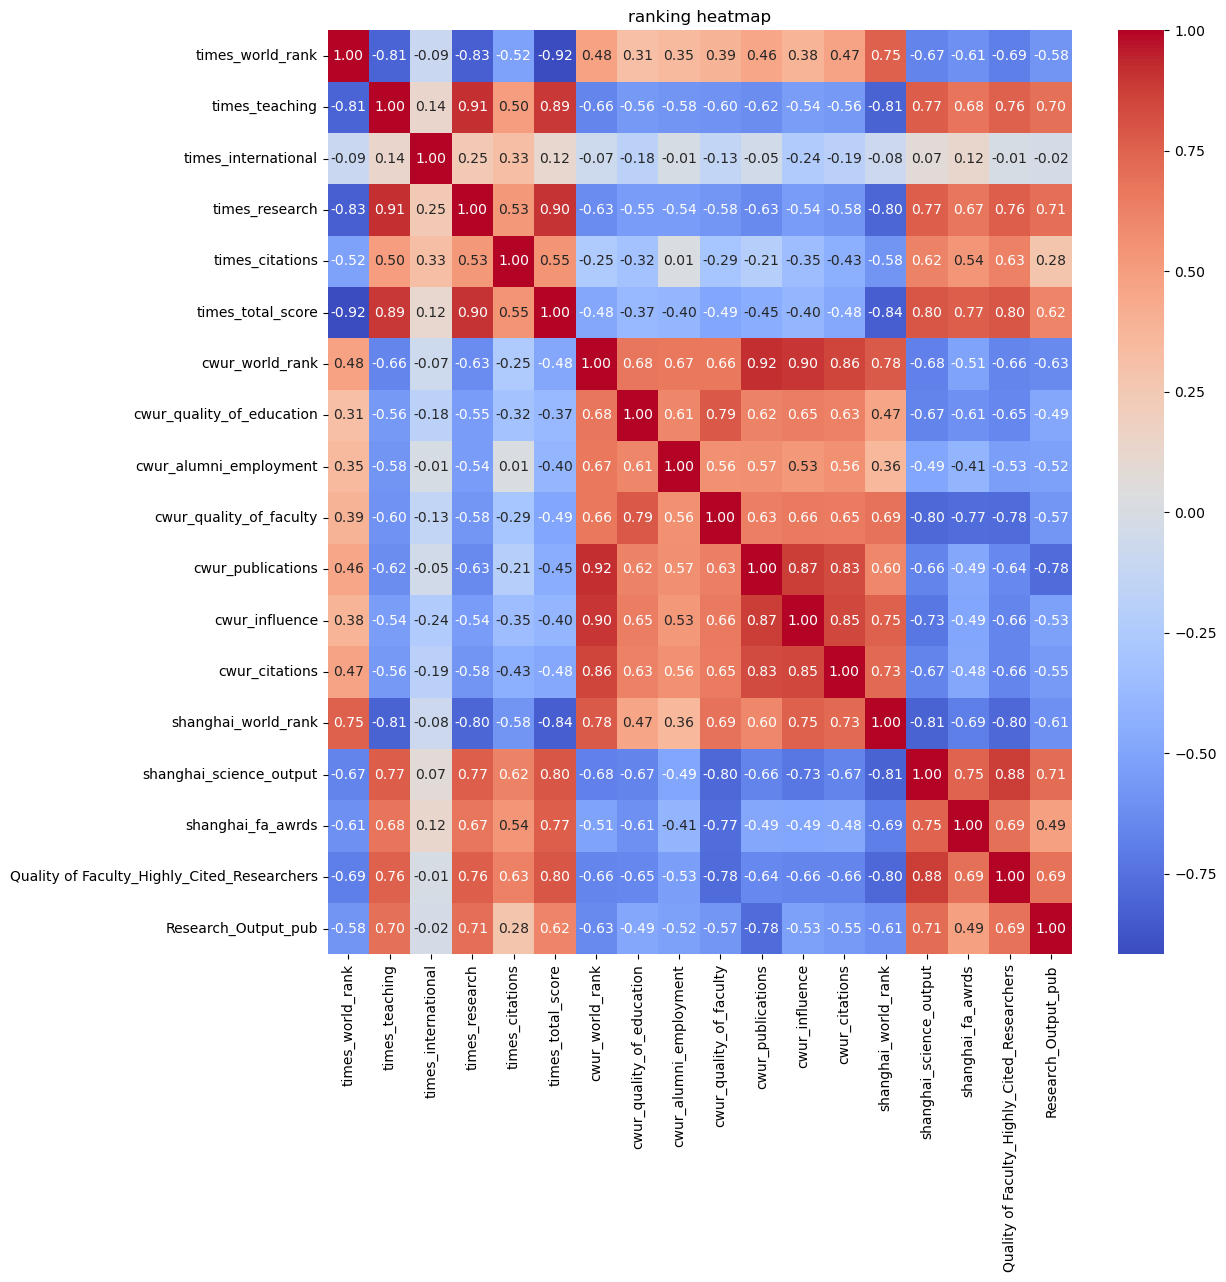

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))  # Set the figure size
sns.heatmap(ranking_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("ranking heatmap")  # Add a title
plt.show()

We can deduct from the heat map some strong relationships between variables, the times university ranking is influenced the most by the researches and teaching results.the strongest relationship exists between them the coeficients are  0.83 and 0.81.

The cwur university ranking  has the strongest relationship with publication and influence and citations with coeficients varying between  0.92 and 0.86.

Shanghai ranking is influenced the most by researches and output publications  variables the correlation coefficients are  0.80 and 0.81

# 4-Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships.


the correlation coeficient is:


0.9041661214522055

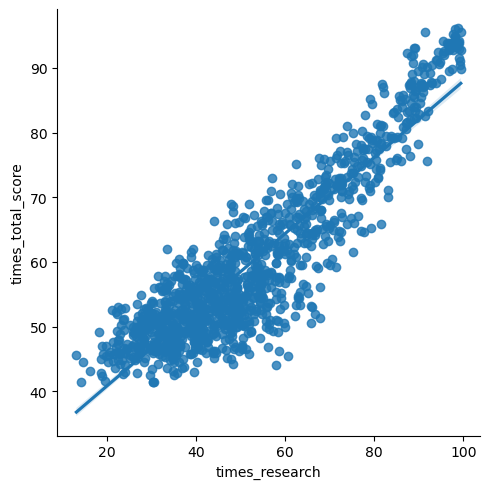

In [131]:
# Create a scatterplot for the "times_research" and "times_total_score" columns in seaborn
sns.lmplot(x = 'times_research', y = 'times_total_score', data= df_ranking)
coef_times = df_ranking['times_research'].corr(df_ranking['times_total_score'])
print ('the correlation coeficient is:' ) 
coef_times



the correlation coeficient is:


0.9230370551193199

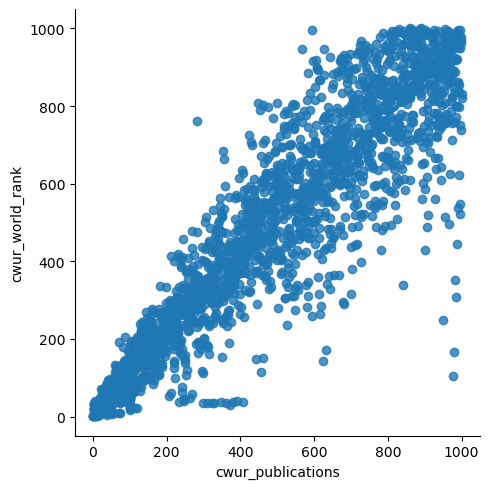

In [133]:
# Create a scatterplot for the "cwur_publications" and "cwur_world_rank" columns in seaborn 
sns.lmplot(x = 'cwur_publications', y = 'cwur_world_rank', data= df_ranking)
coef_cwur = df_ranking['cwur_publications'].corr(df_ranking['cwur_world_rank'])
print ('the correlation coeficient is:' ) 
coef_cwur

 there is a linear trend with a large number of points that fall close to the trend line.
So in our case the scatterplots results follow what the heatmap displayed above.

Even if we can see a linear trend but some the spots are not following the trends we can visualize them falling apart.

the coorelation coeficient is:


-0.814938067124806

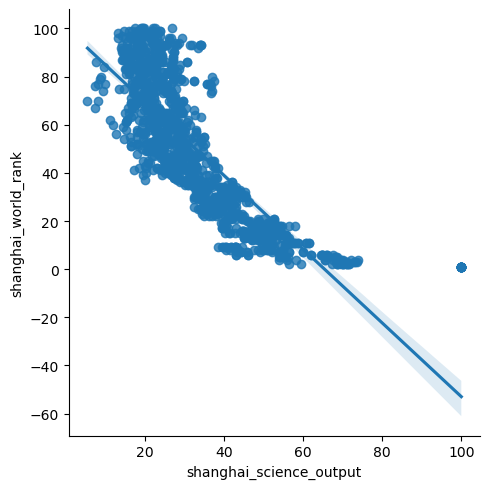

In [129]:
# Create a scatterplot for the "shanghai_researches" and "shanghai_total_score" columns in seaborn

sns.lmplot(x = 'shanghai_science_output', y = 'shanghai_world_rank', data= df_ranking)
coef_shan = df_ranking['shanghai_world_rank'].corr(df_ranking['shanghai_science_output'])
print ('the coorelation coeficient is:' ) 
coef_shan

Based on the correlation relationships discussed in the Q3 abbove and according to scatterplots we will demonstrate whether they are effective or not,we crossed so the same variables for each of the three world ranking,
we can notive then linear trends with a large number of points that fall close to the trend line.
So in our case the scatterplots results fit well with the heatmap results.

# 3-Create a pair plot of the entire data set

In [27]:
# Keep only the variables you want to use in the pair plot for the times iniversity ranking

sub_pplot = df_ranking[['times_teaching','times_international','times_research','times_citations','times_total_score']]

In [28]:
# Create a pair plot 

pp = sns.pairplot(sub_pplot)

In [29]:
# Keep only the variables you want to use in the pair plot for the cwur iniversity ranking

sub_pplot1 = df_ranking[['cwur_world_rank','cwur_quality_of_education','cwur_alumni_employment', 'cwur_quality_of_faculty', 'cwur_publications',
                       'cwur_influence','cwur_citations']]

In [30]:
# Create a pair plot 

pp_c = sns.pairplot(sub_pplot1)

In [31]:
# Keep only the variables you want to use in the pair plot for the shanghai iniversity ranking

sub_pplot2 = df_ranking[['shanghai_world_rank','shanghai_science_output', 'shanghai_fa_awrds', 'Quality of Faculty_Highly_Cited_Researchers','Research_Output_pub']]


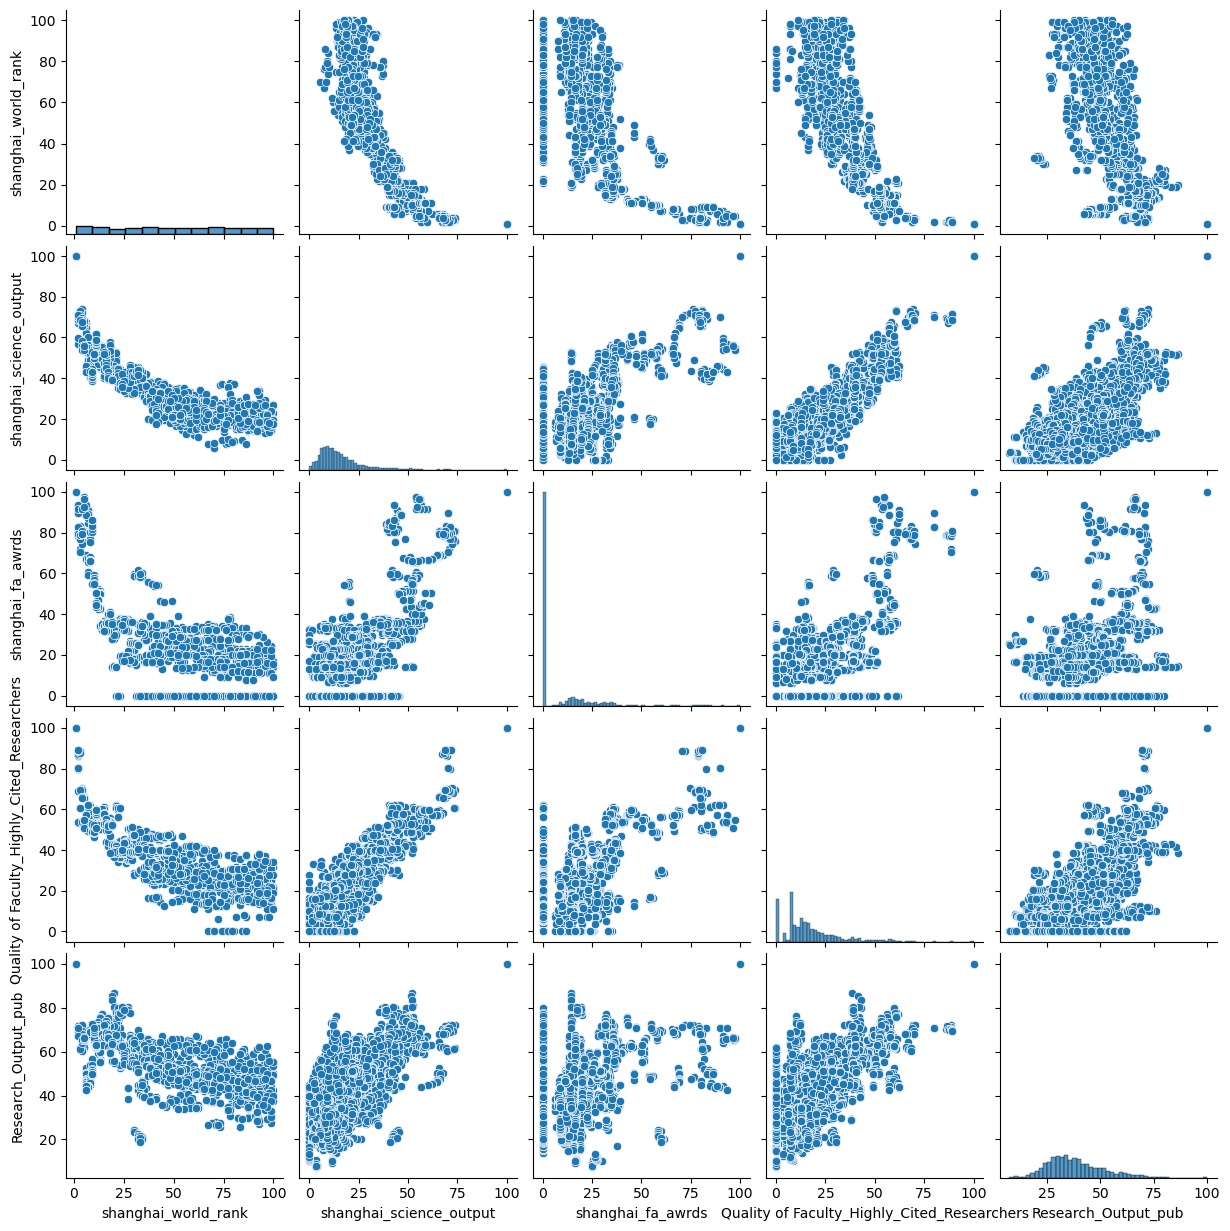

In [32]:
# Create a pair plot 

pp_s = sns.pairplot(sub_pplot2)

Since a have a question about comparing the effectiveness of the 3 universities world ranking, i want to compare their 3 distributions to chose the most effective and reliable.

# 6-Create a categorical plot and interpret the results.

<Axes: xlabel='times_world_rank', ylabel='Count'>

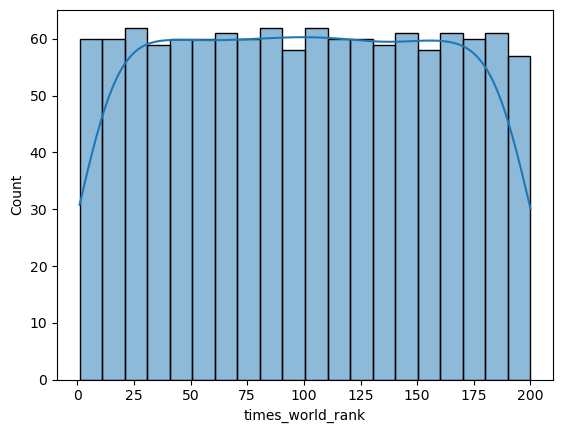

In [35]:
# Use a histogram to visualize the distribution of the variables
sns.histplot(df_ranking['times_world_rank'], bins = 20, kde = True)

In [36]:
#creating a times_ranking_flag column using loc function
df_ranking.loc[df_ranking['times_world_rank'] <= 50 , 'times_ranking_flag'] = 'highest-ranking universities'

In [37]:
df_ranking.loc[(df_ranking['times_world_rank'] > 50 ) & (df_ranking['times_world_rank'] <= 100 ), 'times_ranking_flag'] = 'Middle-ranking universities'

In [38]:
df_ranking.loc[df_ranking['times_world_rank'] > 100 , 'times_ranking_flag'] = 'lowest-ranking universities'

In [39]:
#Checking the frequency of Frequency_flag column categories
df_ranking['times_ranking_flag'].value_counts(dropna=False)

times_ranking_flag
NaN                             6848
lowest-ranking universities      599
highest-ranking universities     301
Middle-ranking universities      301
Name: count, dtype: int64

In [40]:
# the times university ranking catplot 
times_rank_cat = sns.catplot(
    data=df_ranking, x='year', y='times_world_rank', 
    jitter=False, hue='times_ranking_flag',
    height=8, aspect=2)

<Axes: xlabel='cwur_world_rank', ylabel='Count'>

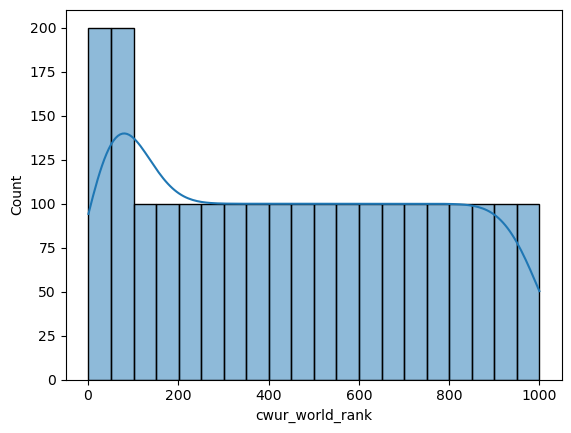

In [41]:
# Use a histogram to visualize the distribution of the variables
sns.histplot(df_ranking['cwur_world_rank'], bins = 20, kde = True)

In [42]:
#creating a cwur_ranking_flag column using loc function
df_ranking.loc[df_ranking['cwur_world_rank'] <= 50 , 'cwur_ranking_flag'] = 'highest-ranking universities'

In [43]:
df_ranking.loc[(df_ranking['cwur_world_rank'] > 50 ) & (df_ranking['cwur_world_rank'] <= 100 ), 'cwur_ranking_flag'] = 'Middle-ranking universities'

In [44]:
df_ranking.loc[(df_ranking['cwur_world_rank'] > 100 ) & (df_ranking['cwur_world_rank'] <= 400 ), 'cwur_ranking_flag'] = 'lower-middele ranking universities'

In [45]:
df_ranking.loc[df_ranking['cwur_world_rank'] > 100 , 'cwur_ranking_flag'] = 'lowest-ranking universities'

In [46]:
#Checking the frequency of Frequency_flag column categories
df_ranking['cwur_ranking_flag'].value_counts(dropna=False)

cwur_ranking_flag
NaN                             5849
lowest-ranking universities     1800
Middle-ranking universities      200
highest-ranking universities     200
Name: count, dtype: int64

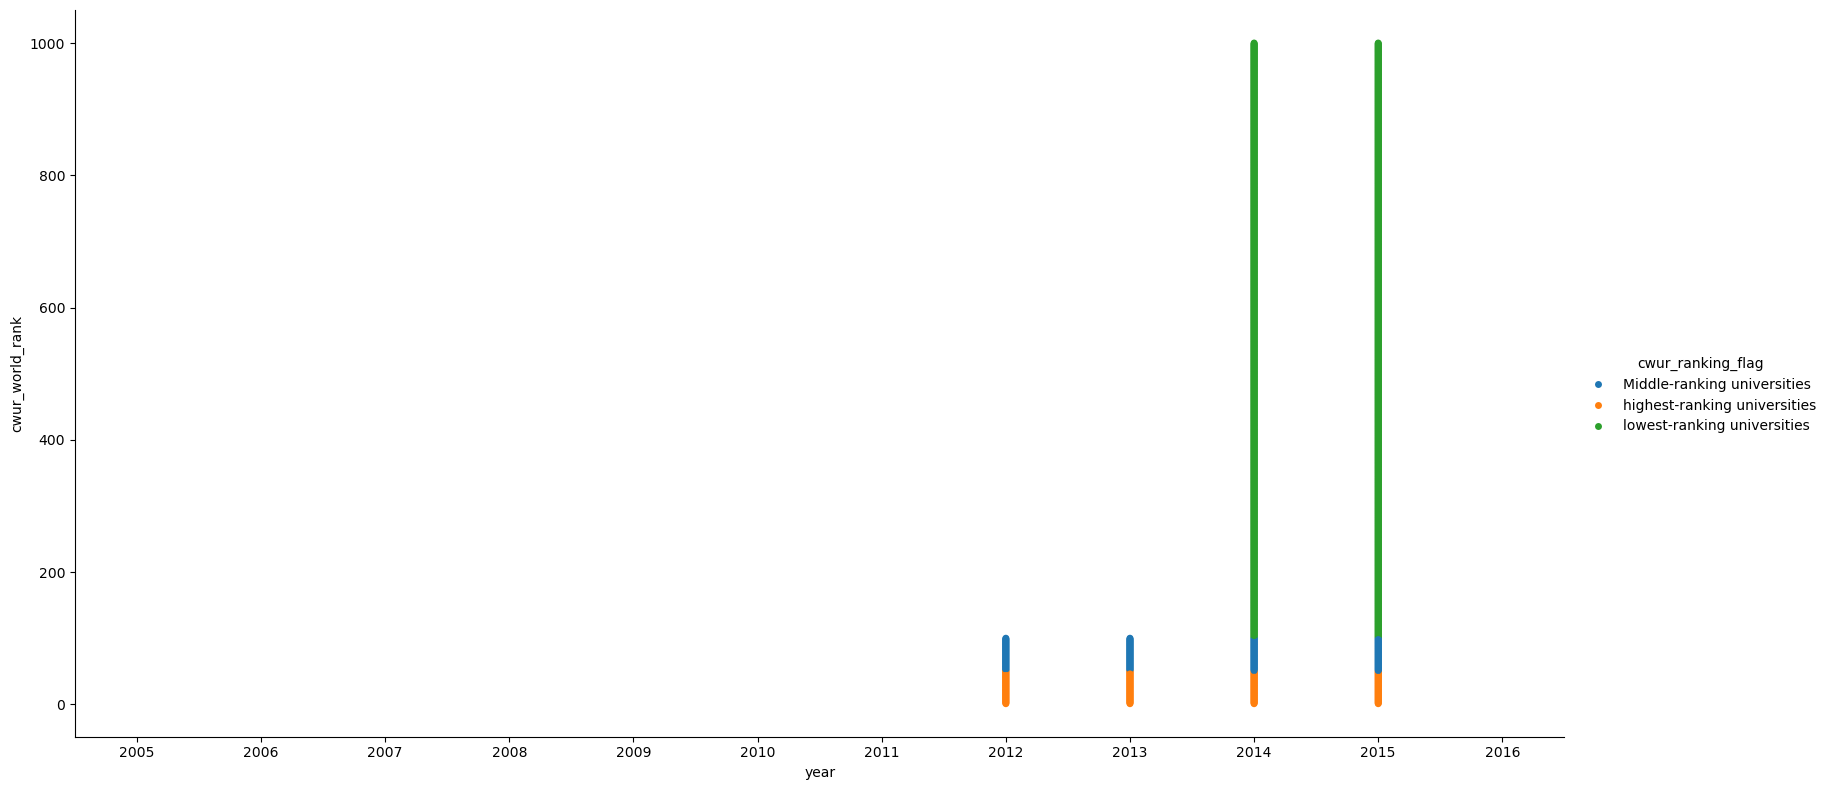

In [47]:
# the cwur university ranking catplot 
cwur_rank_cat = sns.catplot(
    data=df_ranking, x='year', y='cwur_world_rank', 
    jitter=False, hue='cwur_ranking_flag',
    height=8, aspect=2)

<Axes: xlabel='shanghai_world_rank', ylabel='Count'>

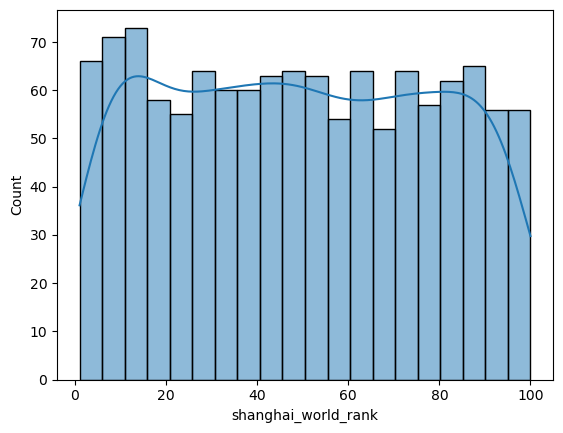

In [48]:
# Use a histogram to visualize the distribution of the variables
sns.histplot(df_ranking['shanghai_world_rank'], bins = 20, kde = True)

In [49]:
#creating a shanghai_ranking_flag column using loc function
df_ranking.loc[df_ranking['shanghai_world_rank'] <= 25 , 'shanghai_ranking_flag'] = 'Highest-ranking universities'

In [50]:
df_ranking.loc[(df_ranking['shanghai_world_rank'] > 25 ) & (df_ranking['shanghai_world_rank'] <= 75 ) , 'shanghai_ranking_flag'] = 'Middle-ranking universities'

In [51]:
df_ranking.loc[df_ranking['shanghai_world_rank'] > 75 , 'shanghai_ranking_flag'] = 'Lowest-ranking universities'

In [52]:
#Checking the frequency of Frequency_flag column categories
df_ranking['shanghai_ranking_flag'].value_counts(dropna=False)

shanghai_ranking_flag
NaN                             6822
Middle-ranking universities      608
Highest-ranking universities     323
Lowest-ranking universities      296
Name: count, dtype: int64

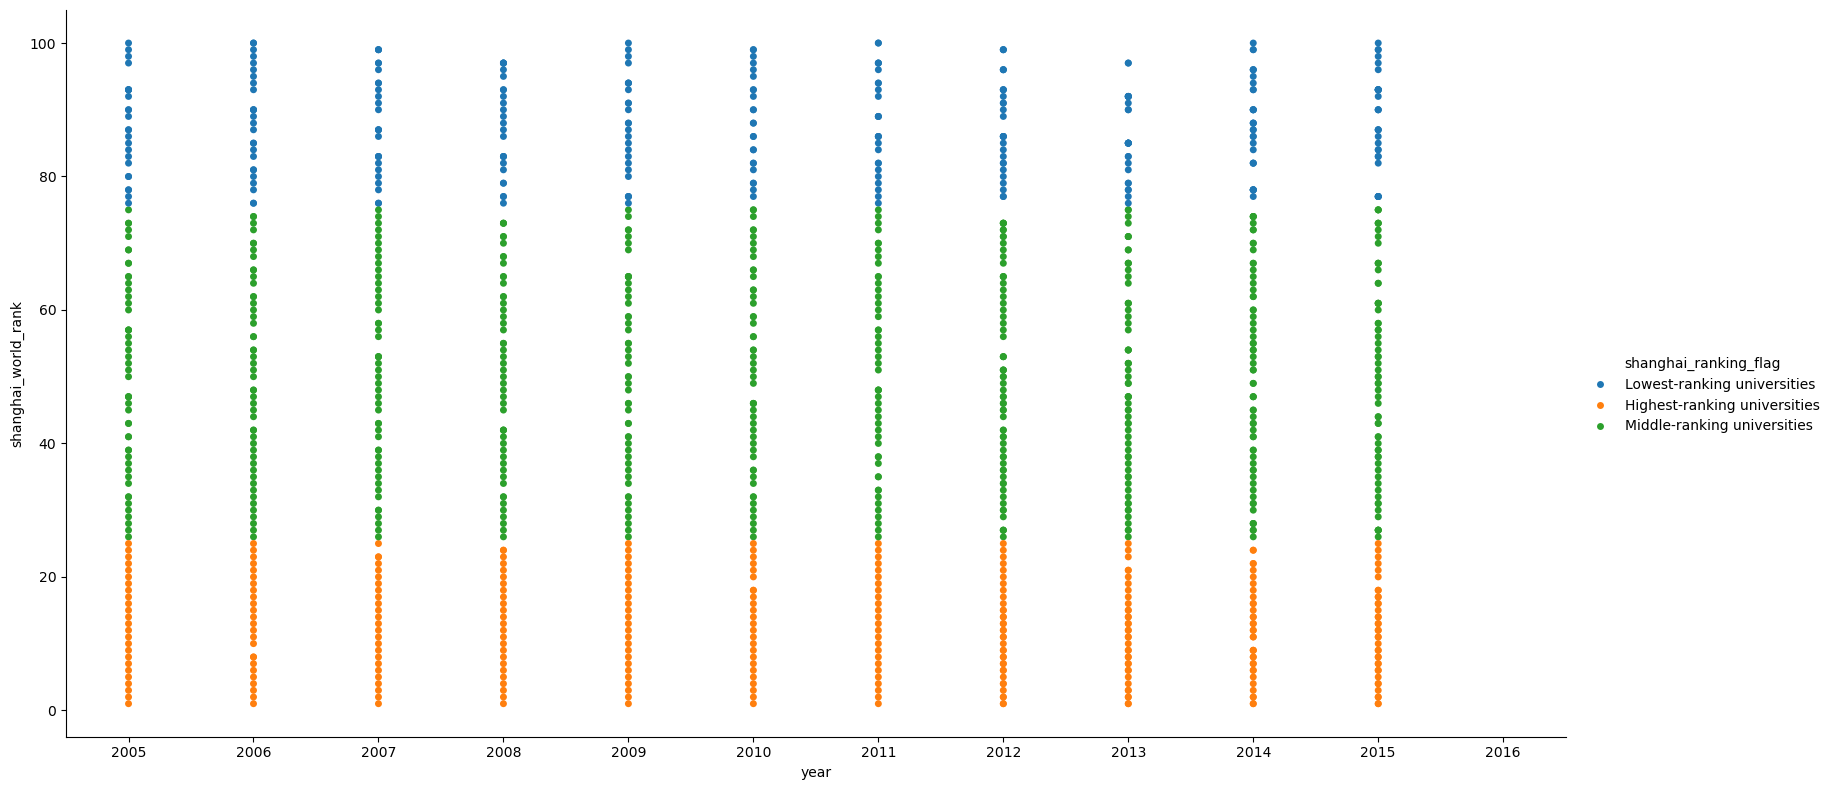

In [53]:
# the shanghai university ranking catplot 
cwur_rank_cat = sns.catplot(
    data=df_ranking, x='year', y='shanghai_world_rank', 
    jitter=False, hue='shanghai_ranking_flag',
    height=8, aspect=2)

First let me remind that the empty values are generated by the combination of three different universities ranking with different criterias and indicators.
considering the ranking flag, we split the ranking to  highest, middle and lowest.

An observation that began at different times: 2005 for the Shanghai ranking, 2011 for Times, and 2012 for CWUR, which continued until 2015.

Times proposes the same distribution of categories each year, divided between the three categories.
For the first two years, CWUR proposed a ranking of a reduced number of universities distributed between best and average. Starting in 2014, more universities joined the ranking, and the lowest ranking was added.

For shanghai ranking the whole duration of the observation from 2005 until 2015 we can see the same distibution with no great change.

# 7-Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far

Are there correlations between ranking indicators and the total score?
Yes there are collections with strong relationsships between ranking scores and indicators.

Are there trends in the ranking score over time?
yes we could visualize that the ranking is almost similar over years except for the case of the data update.


# 8-Define any hypotheses that you can at this point. You’ll be testing these later on.

Hypothesis:

the sames universities and countries are maintaining the same ranking places.
